# First NN with torch 

In [13]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
file_path = "data/voice.csv"  
data = pd.read_csv(file_path)

data['label'] = data['label'].map({'male': 1, 'female': 0})

X = data.drop(columns=['label']).values  
y = data['label'].values  

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [4]:
class SexPredictionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [5]:
train_dataset = SexPredictionDataset(X_train, y_train)
test_dataset = SexPredictionDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()  
        )

    def forward(self, x):
        return self.fc(x)

In [10]:
input_size = X_train.shape[1]
model = SimpleNN(input_size)


criterion = nn.BCELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 10/200, Train Loss: 0.3395, F1-Score: 0.9117
Epoch 20/200, Train Loss: 0.3039, F1-Score: 0.9198
Epoch 30/200, Train Loss: 0.2637, F1-Score: 0.9294
Epoch 40/200, Train Loss: 0.2409, F1-Score: 0.9393
Epoch 50/200, Train Loss: 0.2054, F1-Score: 0.9531
Epoch 60/200, Train Loss: 0.1887, F1-Score: 0.9534
Epoch 70/200, Train Loss: 0.2155, F1-Score: 0.9637
Epoch 80/200, Train Loss: 0.1638, F1-Score: 0.9315
Epoch 90/200, Train Loss: 0.1505, F1-Score: 0.9644
Epoch 100/200, Train Loss: 0.7620, F1-Score: 0.9694
Epoch 110/200, Train Loss: 0.4717, F1-Score: 0.9751
Epoch 120/200, Train Loss: 0.5566, F1-Score: 0.9437
Epoch 130/200, Train Loss: 0.8114, F1-Score: 0.9703
Epoch 140/200, Train Loss: 0.6880, F1-Score: 0.9704
Epoch 150/200, Train Loss: 0.7103, F1-Score: 0.9750
Epoch 160/200, Train Loss: 0.6129, F1-Score: 0.9417
Epoch 170/200, Train Loss: 0.7023, F1-Score: 0.9703
Epoch 180/200, Train Loss: 0.3997, F1-Score: 0.9720
Epoch 190/200, Train Loss: 0.8877, F1-Score: 0.9733
Epoch 200/200, Train 

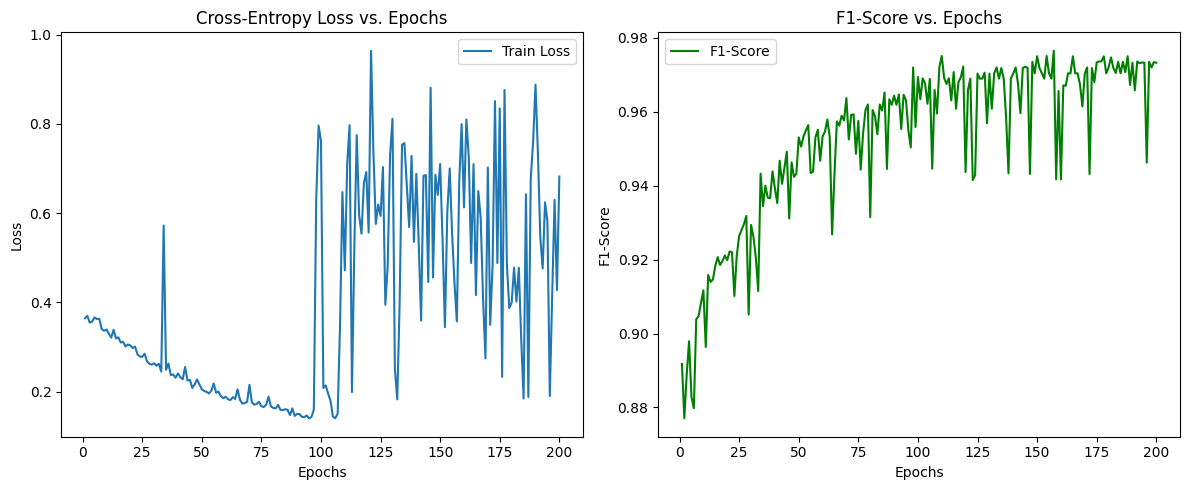

In [15]:
train_losses = []
f1_scores = []

epochs = 200
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        y_test_pred_class = (y_test_pred >= 0.5).float()
        
        f1 = f1_score(y_test.numpy(), y_test_pred_class.numpy())
        f1_scores.append(f1)

        # Afficher les résultats tous les 10 epochs
        if (epoch + 1) % 10 == 0:  # Affichage tous les 10 epochs
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, F1-Score: {f1:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), f1_scores, label='F1-Score', color='green')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
model.eval()  
with torch.no_grad():
    y_test_pred = model(X_test)  
    y_test_pred_class = (y_test_pred >= 0.5).float()  

    f1 = f1_score(y_test.numpy(), y_test_pred_class.numpy())
    total_correct = (y_test_pred_class == y_test).sum().item()
    accuracy = total_correct / len(y_test)

    print("\nPerformance sur le jeu de test :")
    print(f"F1-Score : {f1:.4f}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Correct Predictions : {total_correct}/{len(y_test)}")



Performance sur le jeu de test :
F1-Score : 0.9733
Accuracy : 0.9716
Correct Predictions : 616/634
